<a href="https://colab.research.google.com/github/ksh-dong/Python25Study/blob/main/05_02_%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D_%EA%B7%B8%EB%A6%AC%EB%93%9C%EC%84%9C%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 지금까지 배운 알고리즘은 훈련세트와 테스트세트를 나누어평가를 진행하는데
# 근데 결국 테스트세트로 평가를 하면 테스트세트에 맞는 모델이 만들어 지는 결론이 나온다
# 테스트 세트에 일반화 성능을 올바르게 예측하려면 가능한 한
# 테스트세트를 사용하지 말아야 한다.
# 모델을 만들고 나서 마지막에 딱 한번 사용하는 것이 좋다.

# 결정트리에서 배운 max_depth=3으로 테스트 해봤는데 이것이 최선일까?
# 결정트리에서 max_depth 매개변수를 사용한 하이퍼파라미터 튜닝 해보자.

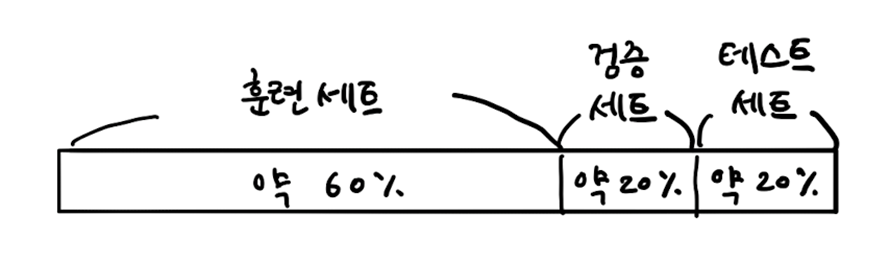

In [2]:
# 검증세트
# 테스트 세트를 사용하지 않으려면 모델이 과대적합인지
# 과소적합인지 판단하기 어렵다.
# 테스트 세트를 사용하지 않고 측정하는 간단한 방법은
# 훈련세트를 또 나누는 것이다.
# 훈련세트 60%, 검증세트 20%, 테스트세트 20% -> 실무에서 많이 쓰는 기법

# 테스트하고 싶은 매개변수를 바꿔가면서 가장 좋은 모델이 나올 수 있음
# 이 매개변수를 사용해 훈련세트와 검증세트를 합쳐
# 전체 훈련 데이터에서 모델을 다시 훈련함
# 마지막 테스트에서 최종 점수를 평가함
# 훈련세트에서 모델을 훈련하고 검증세트로 모델을 평가함.
# 마지막 세트에서 테스트세트를 이용해 최종 점수를 평가함.

In [3]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [4]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [7]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target) # 훈련 60$ 짜리로 훈련

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))
# 매개변수를 바꿔서 더 좋은 모델을 찾아야 함

0.9971133028626413
0.864423076923077


In [10]:
# 검증세트를 만드느냐고 훈련 세트가 줄었음. (이럴때 많은 데이터를 훈련하면 좋은 결과가 나옴)
# 교차 검증 : 검증 세트를 떼어 내어 평가하는 과정을 여러번 반복함
# [훈련세트, 훈련세트, 검증세트]
# [훈련세트, 검증세트, 훈련세트]
# [검증세트, 훈련세트, 훈련세트] -> 패리티 방식(3-폴드 교차 검증)
# 5-폴드, 10-폴드도 있음
# 사이킷런에는 cross_validate()라는 교차 검증 함수를 사용

from sklearn.model_selection import cross_validate

# 평가할 모델 객체를 첫번째 매개변수로 전달함(직접 검증세트를 떼지않고 훈련세트 전체를 전달함)
scores = cross_validate(dt, train_input, train_target)
# scores = cross_validate(dt, train_input, train_target, cv=5)
# cv 매개변수를 이용해 폴드 수를 변경함 cv=5(기본값)
print(scores)
# fit_time(훈련시간), score_time(검증시간), test_score(최종점수) 키를 가진 딕셔너리(k : v)를 반환함

{'fit_time': array([0.03638792, 0.03489351, 0.03203559, 0.04112649, 0.0438087 ]), 'score_time': array([0.00602579, 0.00191021, 0.00935841, 0.00816369, 0.0048871 ]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [ ]:

# {'fit_time : 훈련시간 ': array([0.01590347, 0.01357985, 0.0125258 , 0.01266432, 0.01209831]),
#  'score_time : 검증시간 ': array([0.0026319 , 0.00208259, 0.00182867, 0.00198817, 0.00206494]),
#  'test_score : 검증점수 ': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

In [12]:
import numpy as np

print(np.mean(scores['test_score']))

0.855300214703487


In [14]:
# 주의 : cross_validate()는 훈련세트를 섞어서 폴드를 나누지 않음 -> 분할기 사용(splitter)
# 앞서 우리는 tarin_test_split() 함수로 전체 데이터를 섞은 후 훈련세트를 준비했음
# 만약 교차 검증을 할 때 훈련세트를 섞으려면 분할기(splitter)를 지정해야 한다.

# 사이킷런의 분할기는 교차검증에서 폴드를 어떻게 나눌지를 결정함
# cross_validate()는 기본적으로 회귀모델인 KFold 분할기를 사용함
# 분류 모델일 경우 타킷 클래스를 골고루 나누기 위해서 StratifiedKFold를 사용한다.

from sklearn.model_selection import StratifiedKFold

splitter = StratifiedKFold()
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(scores)

{'fit_time': array([0.02791309, 0.01201725, 0.01266098, 0.01261449, 0.01297259]), 'score_time': array([0.00204062, 0.00209761, 0.00201321, 0.00232601, 0.00196409]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [18]:

# {'fit_time': array([0.02692175, 0.03336358, 0.02086091, 0.03042316, 0.02657533]),
#  'score_time': array([0.00191808, 0.00214911, 0.00205112, 0.00239015, 0.00949883]),
#   'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

print(np.mean(scores['test_score']))    # 85.53% - 5폴드 검증(5개로 나누어 검증)

0.855300214703487


In [21]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(scores)
print(np.mean(scores['test_score']))    # 10번의 검증 평균 85.74%

{'fit_time': array([0.02420616, 0.01433396, 0.01449037, 0.01391506, 0.01418447,
       0.02618933, 0.02475047, 0.02894974, 0.03156424, 0.02766395]), 'score_time': array([0.00222611, 0.0021317 , 0.00192094, 0.00193954, 0.00205326,
       0.00647211, 0.00675964, 0.00644827, 0.00444722, 0.00619578]), 'test_score': array([0.83461538, 0.87884615, 0.85384615, 0.85384615, 0.84615385,
       0.87307692, 0.85961538, 0.85549133, 0.85163776, 0.86705202])}
0.8574181117533719
